## 1) Libraries Installation
##### The cell below is to help you keep track the libraries used and install them quickly.
##### Ensure the correct library names are used, and follow the syntax: **%pip install PACKAGE_NAME**.

In [1]:
%pip install pandas
%pip install matplotlib
%pip install arch 
%pip install scikit-learn

# add commented pip installation lines for packages used as shown above for ease of testing
# the line should follow the format %pip install PACKAGE_NAME


[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
%pip install pmdarima

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## 2) Main Section for Code
### **ALL code for machine learning and dataset analysis** should be entered below.
##### Ensure that your code is clear and readable.
##### Remember to include comments and markdown notes as necessary to explain and highlight important segments of your code.

### Data Manipulation

In [3]:
## libraries 
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from statsmodels.tsa.api import VAR
from pmdarima import auto_arima
import matplotlib.dates as mdates


#### Cleaning and transformation

In [4]:
# load data
quar_df = pd.read_csv('Quarterly Data.csv', skiprows = [1,2], index_col= [0])
quar_df.columns = [c.upper() for c in quar_df.columns]
quar_df.head()



,GDPC1,PCECC96,PCDGX,PCESVX,PCNDX,GPDIC1,FPIX,Y033RC1Q027SBEAX,PNFIX,PRFIX,...,TNWMVBSNNCBBDIX,TLBSNNBX,TLBSNNBBDIX,TABSNNBX,TNWBSNNBX,TNWBSNNBBDIX,CNCFX,S&P 500,S&P DIV YIELD,S&P PE RATIO
sasdate,,,,,,,,,,,,,,,,,,,,,
3/1/1959,3352.129,2039.017,68.6651,1374.1739,689.1172,354.894,357.0174,47.8021,171.0783,282.9707,...,1341.67,333245.24,266668.11,2426352.41,2092.54,1674.48,124.9663,55.5167,3.1765,18.6211
6/1/1959,3427.667,2070.508,71.2495,1394.7096,694.8197,382.500,368.0640,49.2332,176.0004,292.8479,...,1294.15,345845.01,273329.36,2434975.21,2088.55,1650.63,126.5305,57.5067,3.1012,19.2899
9/1/1959,3430.057,2092.138,72.6270,1413.6627,697.4699,357.798,371.9585,50.8372,180.7406,287.3778,...,1320.72,354808.05,275139.48,2434604.03,2079.21,1612.34,128.9557,58.7300,3.0720,18.9544
12/1/1959,3439.832,2094.495,69.1573,1430.8157,701.7617,369.442,367.6452,50.7342,180.2333,279.2502,...,1165.65,349400.81,254967.79,2429055.21,2079.05,1517.14,137.0372,57.7633,3.1572,17.8221
3/1/1960,3517.181,2114.532,71.3815,1443.7405,703.5338,406.581,379.9162,52.4985,186.4967,287.8417,...,1327.63,362821.95,278692.55,2451394.44,2087.97,1603.82,130.1872,56.2767,3.3850,16.8284


In [5]:
 # transformation function
def apply_transformation(series, tcode):
    return series
    if tcode == 1:
        return series
    elif tcode == 2:
        return series.diff()
    elif tcode == 3:
        return series.diff().diff()
    elif tcode == 4:
        return np.log(series)
    elif tcode == 5:
        return np.log(series).diff()
    elif tcode == 6:
        return np.log(series).diff().diff()
    elif tcode == 7:
        return series.pct_change()
    else:
        raise ValueError(f"Unknown TCODE: {tcode}")

tcodes = pd.read_csv("Quarterly Data.csv", skiprows= [1], nrows=1, index_col= 0)
tcodes.columns = [c.upper() for c in tcodes.columns]

# transform the time series
quar_df_t = quar_df.apply(lambda x: apply_transformation(x, tcodes[x.name].item()))
quar_df_t.head()







,GDPC1,PCECC96,PCDGX,PCESVX,PCNDX,GPDIC1,FPIX,Y033RC1Q027SBEAX,PNFIX,PRFIX,...,TNWMVBSNNCBBDIX,TLBSNNBX,TLBSNNBBDIX,TABSNNBX,TNWBSNNBX,TNWBSNNBBDIX,CNCFX,S&P 500,S&P DIV YIELD,S&P PE RATIO
sasdate,,,,,,,,,,,,,,,,,,,,,
3/1/1959,3352.129,2039.017,68.6651,1374.1739,689.1172,354.894,357.0174,47.8021,171.0783,282.9707,...,1341.67,333245.24,266668.11,2426352.41,2092.54,1674.48,124.9663,55.5167,3.1765,18.6211
6/1/1959,3427.667,2070.508,71.2495,1394.7096,694.8197,382.500,368.0640,49.2332,176.0004,292.8479,...,1294.15,345845.01,273329.36,2434975.21,2088.55,1650.63,126.5305,57.5067,3.1012,19.2899
9/1/1959,3430.057,2092.138,72.6270,1413.6627,697.4699,357.798,371.9585,50.8372,180.7406,287.3778,...,1320.72,354808.05,275139.48,2434604.03,2079.21,1612.34,128.9557,58.7300,3.0720,18.9544
12/1/1959,3439.832,2094.495,69.1573,1430.8157,701.7617,369.442,367.6452,50.7342,180.2333,279.2502,...,1165.65,349400.81,254967.79,2429055.21,2079.05,1517.14,137.0372,57.7633,3.1572,17.8221
3/1/1960,3517.181,2114.532,71.3815,1443.7405,703.5338,406.581,379.9162,52.4985,186.4967,287.8417,...,1327.63,362821.95,278692.55,2451394.44,2087.97,1603.82,130.1872,56.2767,3.3850,16.8284


We chose to use only consider variables included in Stock and Watson's factor consideration as these were proven to have predictive power for economies. Moreover, doing so eliminates almost half of all variables, making further computation and processing easier.

Source: https://www.princeton.edu/~mwatson/papers/Stock_Watson_HOM_Vol2.pdf

In [6]:
# highlight non-SW factors 
factors = pd.read_csv("Quarterly Data.csv", nrows=1, index_col= 0)
factors.columns = [c.upper() for c in factors.columns]
columns_to_drop = factors.columns[factors.iloc[0] == 0]
GDPC1 = quar_df_t["GDPC1"] # factor removes this, so need to add back later

In [7]:
quar_df_t= quar_df_t.drop(columns=columns_to_drop)
quar_df_t.insert(loc = 0, column = "GDPC1", value = GDPC1) # since target variable is removed by the factor

# process dates, converting to time series as index by quarters
quar_df_filter = quar_df_t.loc[pd.notna(quar_df_t.index), :]
quar_df_filter.index = pd.date_range(start="1959-01-01", freq="Q", periods=len(quar_df_filter))
quar_df_filter.index = quar_df_filter.index.to_period("Q") # converting to period indexed by quarters

quar_df_filter.columns

Index(['GDPC1', 'PCDGX', 'PCESVX', 'PCNDX', 'Y033RC1Q027SBEAX', 'PNFIX',
       'PRFIX', 'A014RE1Q156NBEA', 'A823RL1Q225SBEA', 'FGRECPTX',
       ...
       'SPCS20RSA', 'TWEXAFEGSMTHX', 'EXUSEU', 'EXSZUSX', 'EXJPUSX', 'EXUSUKX',
       'EXCAUSX', 'UMCSENTX', 'USEPUINDXM', 'S&P 500'],
      dtype='object', length=126)

To handle NA data, we keep columns with at least 75% of available data, and impute the rest of the data that is missing or that was introduced by the differencing.

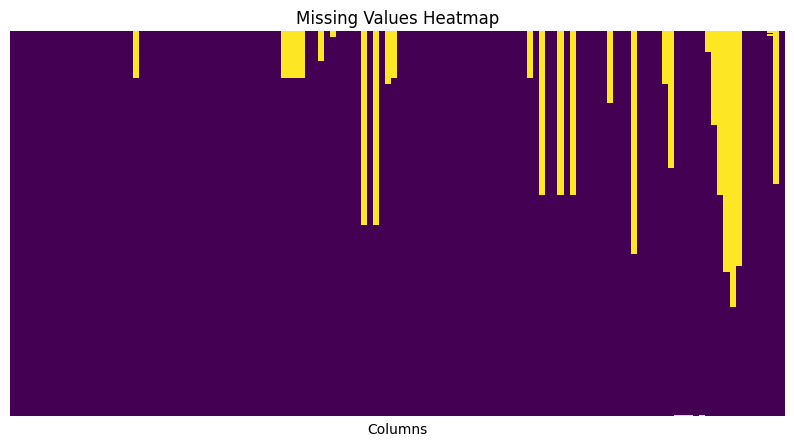

In [8]:
# heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(quar_df_filter.isna(), cmap="viridis", cbar=False, yticklabels=False,xticklabels=False)
plt.xlabel("Columns")
plt.title("Missing Values Heatmap")
plt.show()

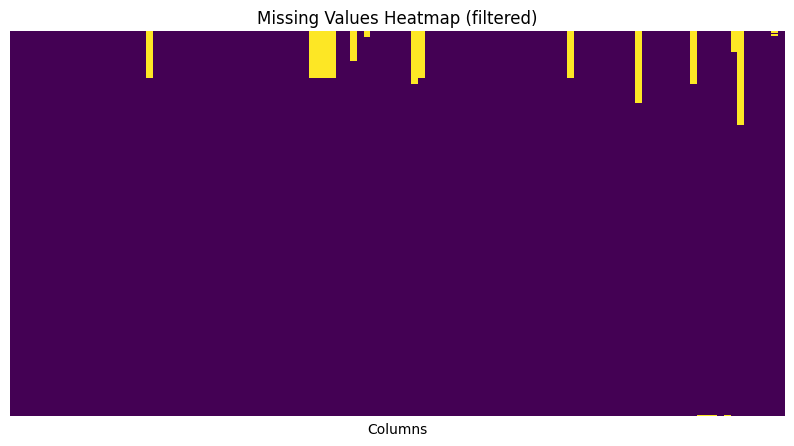

In [9]:
# filter out variables with less than 75% complete data
non_missing_ratio = quar_df_filter.notnull().mean()
threshold = 0.75  # minimum ratio of data present
valid_columns = non_missing_ratio[non_missing_ratio >= threshold].index
quar_df_filter_filtered_vars = quar_df_filter[valid_columns]

plt.figure(figsize=(10, 5))
sns.heatmap(quar_df_filter_filtered_vars.isna(), cmap="viridis", cbar=False, yticklabels=False,xticklabels=False)
plt.xlabel("Columns")
plt.title("Missing Values Heatmap (filtered)")
plt.show()



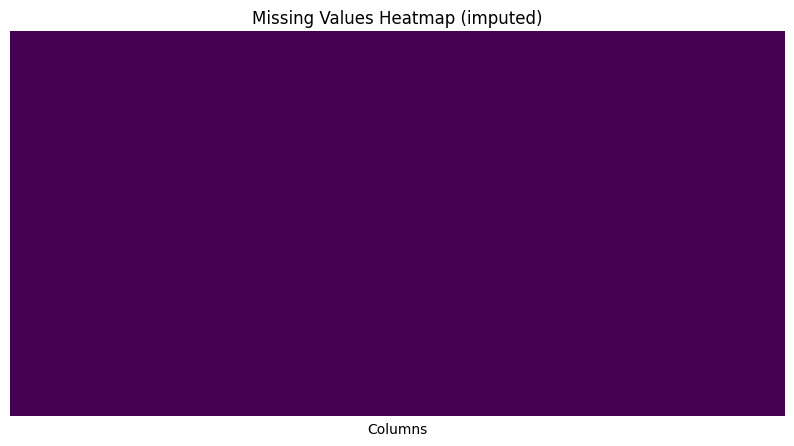

In [10]:
# impute missing values using forward then backward fill
quar_final = quar_df_filter_filtered_vars.fillna(method='ffill').fillna(method='bfill')

plt.figure(figsize=(10, 5))
sns.heatmap(quar_final.isna(), cmap="viridis", cbar=False, yticklabels=False,xticklabels=False)
plt.xlabel("Columns")
plt.title("Missing Values Heatmap (imputed)")
plt.show()


In [11]:
quar_final.head()

,GDPC1,PCDGX,PCESVX,PCNDX,Y033RC1Q027SBEAX,PNFIX,PRFIX,A014RE1Q156NBEA,A823RL1Q225SBEA,FGRECPTX,...,HNOREMQ027SX,TFAABSHNOX,VIXCLSX,USSTHPI,EXSZUSX,EXJPUSX,EXUSUKX,EXCAUSX,UMCSENTX,S&P 500
1959Q1,3352.129,68.6651,1374.1739,689.1172,47.8021,171.0783,282.9707,0.8,-7.7,556.0802,...,3181940.06,9371.98,17.8889,228.01,4.3161,359.8417,2.8095,0.9706,95.3,55.5167
1959Q2,3427.667,71.2495,1394.7096,694.8197,49.2332,176.0004,292.8479,1.4,7.6,578.9494,...,3231997.69,9465.92,17.8889,228.01,4.3190,359.8417,2.8145,0.9619,95.3,57.5067
1959Q3,3430.057,72.6270,1413.6627,697.4699,50.8372,180.7406,287.3778,0.1,5.5,564.7381,...,3270908.16,9457.32,17.8889,228.01,4.3164,359.9281,2.8083,0.9545,95.3,58.7300
1959Q4,3439.832,69.1573,1430.8157,701.7617,50.7342,180.2333,279.2502,0.8,-3.9,566.5192,...,3302374.47,9604.03,17.8889,228.01,4.3344,360.2305,2.8025,0.9498,93.8,57.7633
1960Q1,3517.181,71.3815,1443.7405,703.5338,52.4985,186.4967,287.8417,2.1,-14.2,618.3418,...,3374113.12,9540.49,17.8889,228.01,4.3338,360.5337,2.8030,0.9520,100.0,56.2767


#### Feature Selection

In [12]:
# check that impt variables are still in the dataset 
best = ["LNS14000025", "DMANEMP", "LNS13023621", "USTPU", "IPBUSEQ"]

for i in best:
    print(i in quar_final)

True
True
True
True
True


As mentioned in the report, we identified 5 features that we found were the most significant, and isolate them before building a correlation matrix to choose the rest of the variables 

In [13]:
# remove impt from df before building correlation mat
impt_df =  pd.concat([quar_final.pop(x) for x in best], axis = 1)
impt_df.head()

,LNS14000025,DMANEMP,LNS13023621,USTPU,IPBUSEQ
1959Q1,5.1333,8848.0000,1187.3333,10821.0000,8.1551
1959Q2,4.2000,9148.6667,1187.3333,10940.6667,8.7169
1959Q3,4.4667,8988.3333,1187.3333,10990.6667,8.8899
1959Q4,4.8000,8971.3333,1187.3333,11025.3333,8.7005
1960Q1,4.3667,9316.0000,1187.3333,11114.0000,9.1087


In [14]:
quar_final.head()

,GDPC1,PCDGX,PCESVX,PCNDX,Y033RC1Q027SBEAX,PNFIX,PRFIX,A014RE1Q156NBEA,A823RL1Q225SBEA,FGRECPTX,...,HNOREMQ027SX,TFAABSHNOX,VIXCLSX,USSTHPI,EXSZUSX,EXJPUSX,EXUSUKX,EXCAUSX,UMCSENTX,S&P 500
1959Q1,3352.129,68.6651,1374.1739,689.1172,47.8021,171.0783,282.9707,0.8,-7.7,556.0802,...,3181940.06,9371.98,17.8889,228.01,4.3161,359.8417,2.8095,0.9706,95.3,55.5167
1959Q2,3427.667,71.2495,1394.7096,694.8197,49.2332,176.0004,292.8479,1.4,7.6,578.9494,...,3231997.69,9465.92,17.8889,228.01,4.3190,359.8417,2.8145,0.9619,95.3,57.5067
1959Q3,3430.057,72.6270,1413.6627,697.4699,50.8372,180.7406,287.3778,0.1,5.5,564.7381,...,3270908.16,9457.32,17.8889,228.01,4.3164,359.9281,2.8083,0.9545,95.3,58.7300
1959Q4,3439.832,69.1573,1430.8157,701.7617,50.7342,180.2333,279.2502,0.8,-3.9,566.5192,...,3302374.47,9604.03,17.8889,228.01,4.3344,360.2305,2.8025,0.9498,93.8,57.7633
1960Q1,3517.181,71.3815,1443.7405,703.5338,52.4985,186.4967,287.8417,2.1,-14.2,618.3418,...,3374113.12,9540.49,17.8889,228.01,4.3338,360.5337,2.8030,0.9520,100.0,56.2767


In [15]:
corr_matrix = quar_final.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.85)]

to_drop


['PCDGX',
 'PCESVX',
 'PCNDX',
 'Y033RC1Q027SBEAX',
 'PNFIX',
 'FGRECPTX',
 'SLCEX',
 'EXPGSC1',
 'IMPGSC1',
 'IPDMAT',
 'IPNMAT',
 'IPDCONGD',
 'IPB51110SQ',
 'IPNCONGD',
 'IPB51220SQ',
 'CUMFNS',
 'USCONS',
 'USEHS',
 'USFIRE',
 'USINFO',
 'USPBS',
 'USLAH',
 'USSERV',
 'USTRADE',
 'USWTRADE',
 'CES9092000001',
 'CES9093000001',
 'LNS14000026',
 'LNS12032194',
 'AWHNONAG',
 'HOUSTS',
 'HOUSTW',
 'AMDMNOX',
 'AMDMUOX',
 'ANDENOX',
 'INVCQRMTSPL',
 'GPDICTPI',
 'IPDBS',
 'DMOTRG3Q086SBEA',
 'DFDHRG3Q086SBEA',
 'DREQRG3Q086SBEA',
 'DODGRG3Q086SBEA',
 'DFXARG3Q086SBEA',
 'DCLORG3Q086SBEA',
 'DGOERG3Q086SBEA',
 'DONGRG3Q086SBEA',
 'DHUTRG3Q086SBEA',
 'DHLCRG3Q086SBEA',
 'DTRSRG3Q086SBEA',
 'DRCARG3Q086SBEA',
 'DFSARG3Q086SBEA',
 'DIFSRG3Q086SBEA',
 'DOTSRG3Q086SBEA',
 'WPSFD49502',
 'WPSFD4111',
 'PPIIDC',
 'WPSID61',
 'COMPRNFB',
 'RCPHBS',
 'OPHNFB',
 'ULCNFB',
 'UNLPNBS',
 'TB3MS',
 'BAA10YM',
 'BUSLOANSX',
 'CONSUMERX',
 'NONREVSLX',
 'REALLNX',
 'REVOLSLX',
 'TLBSHNOX',
 'TNWBSHNOX',

In [16]:
# drop variables specified by correlation matrix
quar_final = quar_final.drop(to_drop, axis = 1)

# add impt var back 
quar_df_total= quar_final.merge(impt_df,how= "left", left_index=True, right_index=True)
quar_df_total.head()

,GDPC1,PRFIX,A014RE1Q156NBEA,A823RL1Q225SBEA,TCU,USMINE,CES9091000001,LNS14000012,UEMPLT5,UEMP5TO14,...,GS1TB3MX,GS10TB3MX,VIXCLSX,EXCAUSX,UMCSENTX,LNS14000025,DMANEMP,LNS13023621,USTPU,IPBUSEQ
1959Q1,3352.129,282.9707,0.8,-7.7,88.1496,799.0000,2337.0000,13.5000,1529.0000,1142.0000,...,0.73,1.22,17.8889,0.9706,95.3,5.1333,8848.0000,1187.3333,10821.0000,8.1551
1959Q2,3427.667,292.8479,1.4,7.6,88.1496,803.6667,2331.6667,14.4000,1498.3333,967.3333,...,0.92,1.26,17.8889,0.9619,95.3,4.2000,9148.6667,1187.3333,10940.6667,8.7169
1959Q3,3430.057,287.3778,0.1,5.5,88.1496,776.0000,2331.6667,15.1667,1600.0000,1145.0000,...,1.06,0.96,17.8889,0.9545,95.3,4.4667,8988.3333,1187.3333,10990.6667,8.8899
1959Q4,3439.832,279.2502,0.8,-3.9,88.1496,776.0000,2367.3333,15.4000,1717.3333,1206.3333,...,0.69,0.35,17.8889,0.9498,93.8,4.8000,8971.3333,1187.3333,11025.3333,8.7005
1960Q1,3517.181,287.8417,2.1,-14.2,88.1496,785.0000,2396.6667,14.4333,1578.3333,1066.3333,...,0.70,0.61,17.8889,0.9520,100.0,4.3667,9316.0000,1187.3333,11114.0000,9.1087


In [17]:
#checking for NAN in join
quar_df_total.isna().sum().sum()

0

Training data and test data split

In [18]:
train_size = int(len(quar_df_total) * 0.7) #test-split of 0.7
quar_df_train = quar_df_total[:train_size]
quar_df_test = quar_df_total[train_size:]


### Modeling

#### ARIMA

In [317]:
# find optimal ARIMA parameters
optimal_model = auto_arima(quar_df_train['GDPC1'],
                         start_p=0, start_q=0, max_p=5, max_q=5,
                         seasonal=False,
                         d=None, max_d=2,
                         trace=True,
                         error_action='ignore',
                         suppress_warnings=True,
                         stepwise=True)

print(f"Optimal ARIMA parameters: {optimal_model.order}")


Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-1100.191, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-1187.887, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-1144.598, Time=0.06 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=-1211.092, Time=0.04 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=-1210.619, Time=0.19 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-1211.917, Time=0.17 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-1216.312, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-1211.911, Time=0.24 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=-1175.570, Time=0.20 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-1217.110, Time=0.36 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=-1215.634, Time=0.34 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=-1215.690, Time=0.08 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=-1215.800, Time=0.08 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=-1208.105, Time=0.07 sec
 ARIMA(3,0,3)(0,0,0

In [318]:
# fit model
arima_model = ARIMA(quar_df_train['GDPC1'], order=optimal_model.order)
arima_results = arima_model.fit()


c:\Users\tanke\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\tanke\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\tanke\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


#### VAR

In [ ]:
#fit the vector autoregression model
var_model = VAR(quar_df_train)
var_results = var_model.fit()

### Evaluation

#### Model Evaluation

In [ ]:
# to calculate whether GDP moves in the same direction as that in the actual data
def calculate_directional_accuracy(actual, predicted):
    actual_direction = np.sign(np.diff(actual))
    predicted_direction = np.sign(np.diff(predicted))
    
    correct_directions = np.sum(actual_direction == predicted_direction)
    total_directions = len(actual_direction)
    accuracy = correct_directions / total_directions
    
    metrics = {
        'accuracy': accuracy,
        'correct_predictions': correct_directions,
        'total_predictions': total_directions
    }
    
    return metrics


##### Model Evaluation of ARIMA

In [ ]:
# seeing whether the change in GDP as predicted by ARIMA is the same as that in the test data
arima_forecast = arima_results.forecast(len(quar_df_test))
arima_accuracy = calculate_directional_accuracy(quar_df_test['GDPC1'], arima_forecast)
print("\nARIMA Directional Accuracy:", arima_accuracy)



ARIMA Directional Accuracy: {'accuracy': 0.3974358974358974, 'correct_predictions': 31, 'total_predictions': 78}


##### Model Evaluation of VAR

In [ ]:
# seeing whether the change in GDP as predicted by VAR is the same as that in the test data
var_forecast = var_results.forecast(steps=len(quar_df_test), y = quar_df_train.values)
var_gdp_forecast = var_forecast[:, quar_df_total.columns.get_loc('GDPC1')]
var_accuracy = calculate_directional_accuracy(quar_df_test['GDPC1'], var_gdp_forecast)
print("\nVAR Directional Accuracy:", var_accuracy)



VAR Directional Accuracy: {'accuracy': 0.5, 'correct_predictions': 39, 'total_predictions': 78}


### Fan Charts

In [ ]:
n_forecasts = 5 # 2024 Q4 to 2025 Q4
n_simulations = 1000 
intervals = [0.50, 0.65, 0.80]


In [433]:
def generate_fan_chart(forecasts, intervals, title, arima=False):
    """Generate fan chart with multiple confidence intervals"""
    plt.figure(figsize=(12, 6))
    plt.plot(forecasts.mean(axis=1), color='blue', label='Mean Forecast')
    
    colors = ['lightblue', 'skyblue', 'cornflowerblue']
    for interval, color in zip(intervals, colors):
        lower = np.percentile(forecasts, (100 - interval * 100) / 2, axis=1)
        upper = np.percentile(forecasts, 100 - (100 - interval * 100) / 2, axis=1)
        plt.fill_between(range(len(forecasts)), lower, upper, color=color, alpha=0.3,
                        label=f'{interval*100}% CI')

    quarters = ["2024Q4", '2025Q1', '2025Q2', '2025Q3', '2025Q4']

    
    plt.xticks(ticks=range(len(quarters)), labels=quarters)
    plt.yticks([])

    plt.title(title)
    plt.legend()
    plt.grid(True)
    if arima==True:
        plt.ylim((0.005, 0.01))

    return plt


#### ARIMA Fan Chart

In [ ]:
#optimal_model.order contains (p, d, q) which are the parameters for AR, differencing, and MA components
#obtained from the model with the lowest AIC
arima_model = ARIMA(quar_df_total['GDPC1'], order=optimal_model.order)
arima_results = arima_model.fit()



In [ ]:
arima_forecasts = np.zeros((n_forecasts, n_simulations)) # simulating the next 5 quarters
for i in range(n_simulations):
    arima_forecasts[:, i] = arima_results.simulate(n_forecasts) # appending each result to arima_forecasts


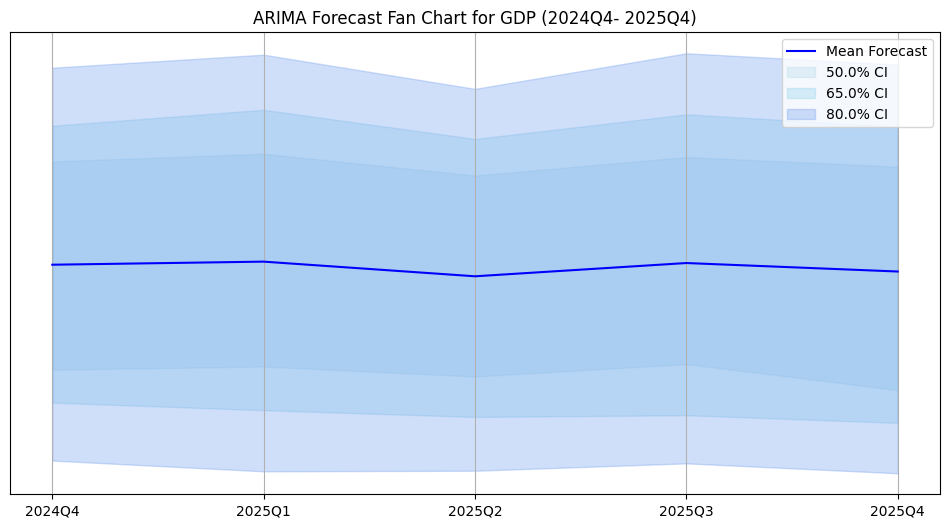

In [434]:
arima_fan = generate_fan_chart(
    pd.DataFrame(arima_forecasts), 
    intervals, 
    'ARIMA Forecast Fan Chart for GDP (2024Q4- 2025Q4)',
    
)# plotting the predictions for the next 5 quarters with the confidence intervals
arima_fan.show()

#### VAR Fan Chart

In [ ]:
var_model = VAR(quar_df_total) 
var_results = var_model.fit()

In [419]:
var_forecasts = np.zeros((n_forecasts, n_simulations))
for i in range(n_simulations):
    var_sim = var_results.simulate_var(n_forecasts)
    var_forecasts[:, i] = var_sim[:, quar_df_total.columns.get_loc('GDPC1')]


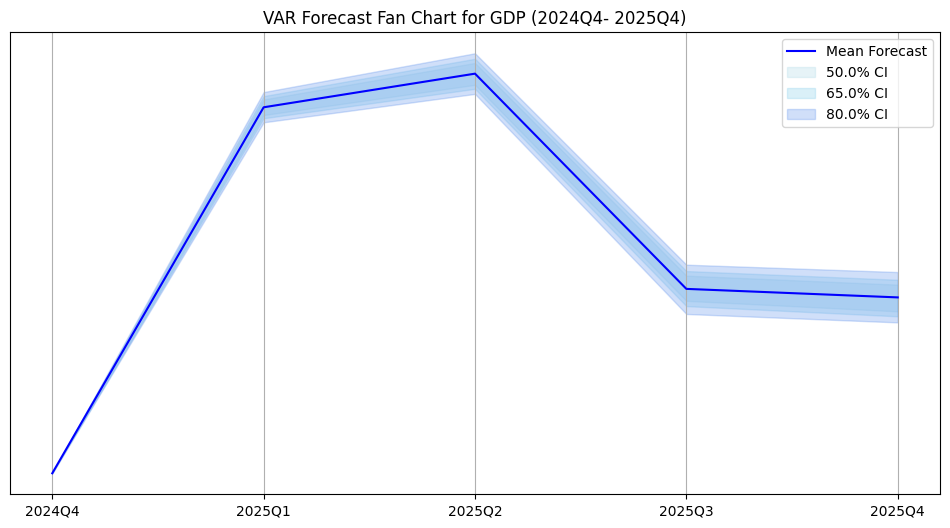

In [435]:
var_fan = generate_fan_chart(
    pd.DataFrame(var_forecasts), 
    intervals, 
    'VAR Forecast Fan Chart for GDP (2024Q4- 2025Q4)'
)
var_fan.show()


### Print forecast summaries

In [421]:
print("\nARIMA Forecasts (Mean):")
print("Q1 2025:", np.mean(arima_forecasts[1]))
print("Q3 2025:", np.mean(arima_forecasts[3]))
print("Q4 2025:", np.mean(arima_forecasts[4]))

print("\nVAR Forecasts (Mean):")
print("Q1 2025:", np.mean(var_forecasts[1]))
print("Q3 2025:", np.mean(var_forecasts[3]))
print("Q4 2025:", np.mean(var_forecasts[4]))



ARIMA Forecasts (Mean):
Q1 2025: 0.007841795567209367
Q3 2025: 0.0077478489164908605
Q4 2025: 0.0071791557626370885

VAR Forecasts (Mean):
Q1 2025: 0.2332972106403412
Q3 2025: 0.1177489801713504
Q4 2025: 0.11232545821593655


# ARDL MODEL

In [19]:
from statsmodels.datasets.danish_data import load
from statsmodels.tsa.api import ARDL
from statsmodels.tsa.ardl import ardl_select_order

## Selecting order for ARDL

In [20]:
quar_df_train

,GDPC1,PRFIX,A014RE1Q156NBEA,A823RL1Q225SBEA,TCU,USMINE,CES9091000001,LNS14000012,UEMPLT5,UEMP5TO14,...,GS1TB3MX,GS10TB3MX,VIXCLSX,EXCAUSX,UMCSENTX,LNS14000025,DMANEMP,LNS13023621,USTPU,IPBUSEQ
1959Q1,3352.129,282.9707,0.8,-7.7,88.1496,799.0000,2337.0000,13.5000,1529.0000,1142.0000,...,0.73,1.22,17.8889,0.9706,95.3,5.1333,8848.0000,1187.3333,10821.0000,8.1551
1959Q2,3427.667,292.8479,1.4,7.6,88.1496,803.6667,2331.6667,14.4000,1498.3333,967.3333,...,0.92,1.26,17.8889,0.9619,95.3,4.2000,9148.6667,1187.3333,10940.6667,8.7169
1959Q3,3430.057,287.3778,0.1,5.5,88.1496,776.0000,2331.6667,15.1667,1600.0000,1145.0000,...,1.06,0.96,17.8889,0.9545,95.3,4.4667,8988.3333,1187.3333,10990.6667,8.8899
1959Q4,3439.832,279.2502,0.8,-3.9,88.1496,776.0000,2367.3333,15.4000,1717.3333,1206.3333,...,0.69,0.35,17.8889,0.9498,93.8,4.8000,8971.3333,1187.3333,11025.3333,8.7005
1960Q1,3517.181,287.8417,2.1,-14.2,88.1496,785.0000,2396.6667,14.4333,1578.3333,1066.3333,...,0.70,0.61,17.8889,0.9520,100.0,4.3667,9316.0000,1187.3333,11114.0000,9.1087
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2003Q4,15162.760,982.9726,0.3,7.6,76.8539,574.6667,2736.6667,16.3667,2640.0000,2519.0000,...,0.38,3.37,17.7991,1.3160,92.0,5.4667,8857.6667,4669.3333,25196.6667,76.8365
2004Q1,15248.680,994.4336,0.4,4.4,77.4360,579.0000,2731.3333,16.7667,2582.3333,2413.0000,...,0.31,3.10,16.5098,1.3181,98.0,5.1667,8867.3333,4407.0000,25301.0000,77.9788
2004Q2,15366.850,1025.9823,0.6,2.4,77.9207,589.6667,2737.6667,16.9000,2726.6667,2388.3333,...,0.70,3.52,16.3226,1.3596,93.3,5.1333,8919.3333,4210.3333,25418.0000,78.8259
2004Q3,15512.619,1033.3031,0.5,4.5,78.3778,595.3333,2729.0000,17.0333,2746.0000,2407.6667,...,0.59,2.82,15.3968,1.3078,95.6,5.0000,8951.6667,4081.3333,25480.3333,80.4802


In [21]:
best # refer to earlier section

['LNS14000025', 'DMANEMP', 'LNS13023621', 'USTPU', 'IPBUSEQ']

## Trying to reduce runtime by getting the most correlated features

In [22]:
import pandas as pd

def top_correlated(df, target_col="GDPC1", top_n=5):
    if target_col not in df.columns:
        raise ValueError(f"Column '{target_col}' not found in DataFrame")
    
    # Compute correlations
    correlations = df.corr()[target_col].drop(target_col)
    
    # Sort by absolute correlation value in descending order
    top_correlations = correlations.abs().sort_values(ascending=False).head(top_n)
    

    quar_df_top_corr = top_correlations
    quar_df_top_corr_list= quar_df_top_corr.index.tolist()
    quar_df_top_corr_list=["GDPC1"]+best+quar_df_top_corr_list #ADDS THE best Variable to the list FROM EARLIER, (obtained from the FRED QD report)
    quar_df_top_corr=df[quar_df_top_corr_list]
    return quar_df_top_corr

## change cutoff to vary runtime

In [23]:
cutoff=71
quar_df_train_top_corr = top_correlated(quar_df_train)
smaller_quar_df_train= quar_df_train_top_corr[-cutoff:] #to reduce runtime
endo = smaller_quar_df_train['GDPC1']
exog=smaller_quar_df_train.drop(columns=['GDPC1'])

syntax for ardl_select_order:
- I NEED TO CHECK WHAT IS MAX ORDER


https://www.statsmodels.org/devel/examples/notebooks/generated/autoregressive_distributed_lag.html

- endo = dependent variable (the column you want to predict)
- exog= independent variable
- maxlag= maximum number of lags to be used by the model (eg max lag1 means will kinda create a new column lagging by one period, then see whether the changes in that column affects GDPC1)
- IC= just the error , input bic or aic
- trend=c means include constant when you form the linear equation(??); the a in the y=a+bx 
- seasonal =False because the arima model was also set to false

## Trying out different parameters: Lagging by 5, max order =2 with ic= AIC
- maxlag=5 now, meaning the model can go up to maximum of 5 lags on each variable, BUT THE RUNTIME IS VERY LONG

In [24]:
maxlag=5
maxorder=2

In [25]:

sel_res_aic_lag5= ardl_select_order(endo,
                           exog=exog,
                           maxlag=maxlag,
                           maxorder=maxorder,
                          ic='aic',
                          trend='c',
                          seasonal=False,)
res_aic_lag5= sel_res_aic_lag5.model.fit()
res_aic_lag5.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                  ARDL Model Results                                 
=====================================================================================
Dep. Variable:                         GDPC1   No. Observations:                   71
Model:             ARDL(4, 1, 0, 2, 0, 2, 1)   Log Likelihood                -316.920
Method:                      Conditional MLE   S.D. of innovations             27.418
Date:                       Fri, 21 Feb 2025   AIC                            669.840
Time:                               17:42:14   BIC                            709.524
Sample:                           06-30-1988   HQIC                           685.543
                                - 12-31-2004                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -1641.1261   1395.675     -1.176      0.245   -4444.423    1162.171
GDPC1.L1           0.3785      0.116      3.263      0.002       0.145       0.611
GDPC1.L2          -0.0328      0.130     -0.253      0.801      -0.293       0.228
GDPC1.L3          -0.2000      0.105     -1.910      0.062      -0.410       0.010
GDPC1.L4           0.2867      0.088      3.264      0.002       0.110       0.463
LNS14000025.L0   -40.5963     32.007     -1.268      0.211    -104.885      23.693
LNS14000025.L1   143.3044     32.888      4.357      0.000      77.247     209.362
DMANEMP.L0        -0.1955      0.069     -2.829      0.007      -0.334      -0.057
USTPU.L0           0.0320      0.046      0.696      0.489      -0.060       0.124
USTPU.L1           0.0320      0.046      0.696      0.489      -0.060       0.124
USTPU.L2           0.2447      0.094      2.605      0.012       0.056       0.433
IPBUSEQ.L0        19.9152      4.272      4.661      0.000      11.334      28.497
PRFIX.L0           1.7059      0.378      4.515      0.000       0.947       2.465
PRFIX.L1          -0.2791      0.631     -0.442      0.660      -1.546       0.988
PRFIX.L2           1.1250      0.468      2.405      0.020       0.185       2.065
EXCAUSX.L0       153.7364    169.977      0.904      0.370    -187.672     495.145
EXCAUSX.L1      -337.8560    173.740     -1.945      0.057    -686.824      11.112
==================================================================================
"""

In [26]:
df_res_aic_lag_5= pd.DataFrame({"Coeff":res_aic_lag5.params, "P-value":res_aic_lag5.pvalues}).sort_values(by="P-value")
df_res_aic_lag_5

,Coeff,P-value
IPBUSEQ.L0,19.915185,0.000024
PRFIX.L0,1.705889,0.000039
LNS14000025.L1,143.304421,0.000065
GDPC1.L4,0.286742,0.001988
GDPC1.L1,0.378463,0.001994
DMANEMP.L0,-0.195542,0.006701
USTPU.L2,0.244721,0.012075
PRFIX.L2,1.125002,0.019919
EXCAUSX.L1,-337.856016,0.057459
GDPC1.L3,-0.199992,0.061888


I guess we can remove anything below const, since these variables cant do any better than just simply equating GDPC1 to the constant ????

In [27]:

ardl_forecasts_lag_5= res_aic_lag5.forecast(steps=cutoff, exog=exog[-cutoff:])
ardl_forecasts_lag_5

2005Q1    13455.468003
2005Q2    11769.820763
2005Q3    10746.802880
2005Q4    10907.087670
2006Q1    10777.947085
              ...     
2021Q3    15119.938670
2021Q4    15280.851447
2022Q1    15390.321017
2022Q2    15517.787114
2022Q3    15661.413099
Freq: Q-DEC, Length: 71, dtype: float64

In [28]:
sliced_ardl_test_set= quar_df_test['GDPC1'][:cutoff]

In [29]:
# to calculate whether GDP moves in the same direction as that in the actual data
def calculate_directional_accuracy(actual, predicted):
    actual_direction = np.sign(np.diff(actual))
    predicted_direction = np.sign(np.diff(predicted))
    
    correct_directions = np.sum(actual_direction == predicted_direction)
    total_directions = len(actual_direction)
    accuracy = correct_directions / total_directions
    
    metrics = {
        'accuracy': accuracy,
        'correct_predictions': correct_directions,
        'total_predictions': total_directions
    }
    
    return metrics


ardl_accuracy = calculate_directional_accuracy(sliced_ardl_test_set, ardl_forecasts_lag_5)
print("\nARDL Directional Accuracy:", ardl_accuracy)


ARDL Directional Accuracy: {'accuracy': 0.7428571428571429, 'correct_predictions': 52, 'total_predictions': 70}


## PREDICTING 2025
- refitting the entire model (???)

In [30]:
cutoff=71
quar_df_total_top_corr = top_correlated(quar_df_total)
smaller_quar_df_train= quar_df_total_top_corr[-cutoff:] #to reduce runtime
pred_2025_endo = smaller_quar_df_train['GDPC1']
pred_2025_exog=smaller_quar_df_train.drop(columns=['GDPC1'])


In [31]:
pred_2025_sel_res_aic_lag5= ardl_select_order(pred_2025_endo,
                           exog=pred_2025_exog,
                           maxlag=maxlag,
                           maxorder=maxorder,
                          ic='aic',
                          trend='c',
                          seasonal=False)
pred_2025_res_aic_lag5= pred_2025_sel_res_aic_lag5.model.fit()
pred_2025_res_aic_lag5.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARDL Model Results                              
==============================================================================
Dep. Variable:                  GDPC1   No. Observations:                   71
Model:                  ARDL(5, 1, 2)   Log Likelihood                -387.015
Method:               Conditional MLE   S.D. of innovations             85.194
Date:                Fri, 21 Feb 2025   AIC                            798.030
Time:                        17:42:25   BIC                            824.306
Sample:                    06-30-2008   HQIC                           808.413
                         - 09-30-2024                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const           -747.2658    423.515     -1.764      0.083   -1596.009     101.478
GDPC1.L1           0.7741      0.046     16.982      0.000       0.683       0.865
GDPC1.L2           0.1889      0.052      3.662      0.001       0.086       0.292
GDPC1.L3           0.0101      0.050      0.201      0.842      -0.091       0.111
GDPC1.L4          -0.0694      0.050     -1.400      0.167      -0.169       0.030
GDPC1.L5           0.1267      0.043      2.976      0.004       0.041       0.212
LNS13023621.L0    -0.1042      0.011     -9.543      0.000      -0.126      -0.082
LNS13023621.L1     0.1100      0.014      7.800      0.000       0.082       0.138
IPBUSEQ.L0         9.3969      3.532      2.661      0.010       2.319      16.475
IPBUSEQ.L1         9.3969      3.532      2.661      0.010       2.319      16.475
IPBUSEQ.L2       -15.8238      7.438     -2.127      0.038     -30.730      -0.918
==================================================================================
"""

In [32]:
df_pred_2025_res_aic_lag_5= pd.DataFrame({"Coeff":pred_2025_res_aic_lag5.params, "P-value":pred_2025_res_aic_lag5.pvalues}).sort_values(by="P-value")
df_pred_2025_res_aic_lag_5

,Coeff,P-value
GDPC1.L1,0.774053,1.554542e-23
LNS13023621.L0,-0.104185,2.902024e-13
LNS13023621.L1,0.109952,1.851298e-10
GDPC1.L2,0.188949,5.631549e-04
GDPC1.L5,0.126684,4.332259e-03
IPBUSEQ.L1,9.396946,1.020220e-02
IPBUSEQ.L0,9.396946,1.020220e-02
IPBUSEQ.L2,-15.823846,3.787927e-02
const,-747.265786,8.321118e-02
GDPC1.L4,-0.069421,1.671148e-01


In [33]:
steps= 5
pred_2025_ardl_forecasts_lag_5= pred_2025_res_aic_lag5.forecast(steps=steps, exog=pred_2025_exog[-steps:])
pred_2025_ardl_forecasts_lag_5

2024Q4    23677.058272
2025Q1    23801.219104
2025Q2    23989.008816
2025Q3    24159.106272
2025Q4    24307.004848
Freq: Q-DEC, dtype: float64

In [34]:
def generate_fan_chart(forecasts, intervals, title, arima=False):
    """Generate fan chart with multiple confidence intervals"""
    plt.figure(figsize=(12, 6))
    plt.plot(forecasts.mean(axis=1), color='blue', label='Mean Forecast')
    
    colors = ['lightblue', 'skyblue', 'cornflowerblue']
    for interval, color in zip(intervals, colors):
        lower = np.percentile(forecasts, (100 - interval * 100) / 2, axis=1)
        upper = np.percentile(forecasts, 100 - (100 - interval * 100) / 2, axis=1)
        plt.fill_between(range(len(forecasts)), lower, upper, color=color, alpha=0.3,
                        label=f'{interval*100}% CI')

    quarters = ["2024Q4", '2025Q1', '2025Q2', '2025Q3', '2025Q4']

    
    plt.xticks(ticks=range(len(quarters)), labels=quarters)
    plt.yticks([])

    plt.title(title)
    plt.legend()
    plt.grid(True)
    if arima==True:
        plt.ylim((0.005, 0.01))

    return plt


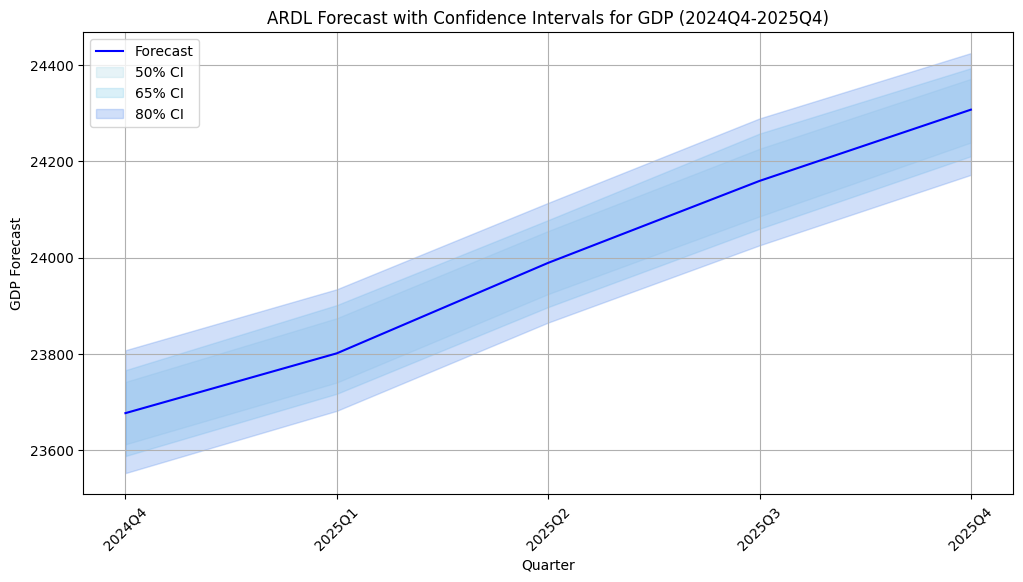

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def plot_forecast_with_intervals(forecast_series, forecast_simulations, intervals, title):
    """Plot forecast with multiple confidence intervals"""
    
    # Ensure forecast_simulations is a NumPy array
    forecast_simulations = np.asarray(forecast_simulations, dtype=float)
    
    plt.figure(figsize=(12, 6))
    plt.plot(forecast_series.index.astype(str), forecast_series.values, color='blue', label='Forecast')

    colors = ['lightblue', 'skyblue', 'cornflowerblue']
    
    for interval, color in zip(intervals, colors):
        lower = np.percentile(forecast_simulations, (100 - interval * 100) / 2, axis=1)
        upper = np.percentile(forecast_simulations, 100 - (100 - interval * 100) / 2, axis=1)
        
        plt.fill_between(forecast_series.index.astype(str), lower, upper, color=color, alpha=0.3,
                         label=f'{interval*100:.0f}% CI')

    plt.xlabel('Quarter')
    plt.ylabel('GDP Forecast')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.show()

# Example forecast data
forecast_series = pd.Series(
    [23677.058272, 23801.219104, 23989.008816, 24159.106272, 24307.004848],
    index=pd.period_range(start="2024Q4", periods=5, freq="Q")
)

# Example simulated forecasts (5 rows for each quarter, multiple simulations per quarter)
np.random.seed(42)
forecast_simulations = np.random.normal(loc=forecast_series.values[:, None], scale=100, size=(5, 1000))  # 1000 simulations

# Plot the forecast with confidence intervals
plot_forecast_with_intervals(
    forecast_series,
    forecast_simulations,
    [0.50, 0.65, 0.80], 
    'ARDL Forecast with Confidence Intervals for GDP (2024Q4-2025Q4)'
)


### END OF CODE